In [1]:
import numpy as np

In [28]:
# Case 1: m gaussians, n dimensions randomly shuffled
# Case 2: m gaussians, n dimensions then an m+1 guassian is added
# Case 3: m gaussians, n dimensions then one gaussian is removed
# all var = 1, but means are different


def generate_gaussian(m, n, n_dims, case="shuffled", means_range=(-25, 25), seed=42):
    """
    Case can be shuffled, added, or removed.
    If shuffled n samples are generated from the mixture of m gaussians.
    If added or removed n*2 samples are generated.
    If added first n sampels are sampled from the mixture of m gaussians, then n samples from m+1 gaussian.
    If removed first n samples are sampled from the mixture of m gaussians, then n samples from m-1 gaussians.
    """
    if case not in {"shuffled", "added", "removed"}:
        raise ValueError("Case must be one of 'shuffled', 'added', or 'removed'.")
    
    np.random.seed(seed)
    means = np.random.uniform(means_range[0], means_range[1], size=(m, n_dims))
    cov = np.eye(n_dims)  

    if case == "shuffled":
        samples = []
        for i in range(n):
            gaussian_idx = np.random.choice(m)
            sample = np.random.multivariate_normal(means[gaussian_idx], cov)
            samples.append(sample)
        return np.array(samples)

    elif case == "added":
        # First n samples from m Gaussians
        samples = []
        for i in range(n):
            gaussian_idx = np.random.choice(m)
            sample = np.random.multivariate_normal(means[gaussian_idx], cov)
            samples.append(sample)
        
        # Add an (m+1)-th Gaussian
        new_mean = np.random.uniform(-10, 10, size=(1, n_dims))
        means = np.vstack([means, new_mean])  
        for i in range(n):
            gaussian_idx = np.random.choice(m + 1)
            sample = np.random.multivariate_normal(means[gaussian_idx], cov)
            samples.append(sample)
        return np.array(samples)

    elif case == "removed":
        if m <= 1:
            raise ValueError("Cannot remove a Gaussian if m <= 1.")
        
        # First n samples from m Gaussians
        samples = []
        for i in range(n):
            gaussian_idx = np.random.choice(m)
            sample = np.random.multivariate_normal(means[gaussian_idx], cov)
            samples.append(sample)
        
        # Remove one Gaussian and sample from the remaining m-1 Gaussians
        reduced_means = means[:-1] 
        for i in range(n):
            gaussian_idx = np.random.choice(m - 1)
            sample = np.random.multivariate_normal(reduced_means[gaussian_idx], cov)
            samples.append(sample)
        return np.array(samples)


In [32]:
# Create datasets
# Case 1: m gaussians, n dimensions randomly shuffled
# Case 2: m gaussians, n dimensions then an one guassian is added
# Case 3: m gaussians, n dimensions then one gaussian is removed
n = 20000
m = 4 # initial number of gaussians
n_dims = 1 # 1d case, can change for higher dimensions
shuffled = generate_gaussian(m, n, n_dims, case="shuffled")
added = generate_gaussian(m, n, n_dims, case="added")
removed = generate_gaussian(m, n, n_dims, case="removed")

np.save("shuffled.npy", shuffled) # baseline no distribution shift
np.save("dist_shift_add_gaus.npy", added)
np.save("dist_shift_remove_gaus.npy", removed)


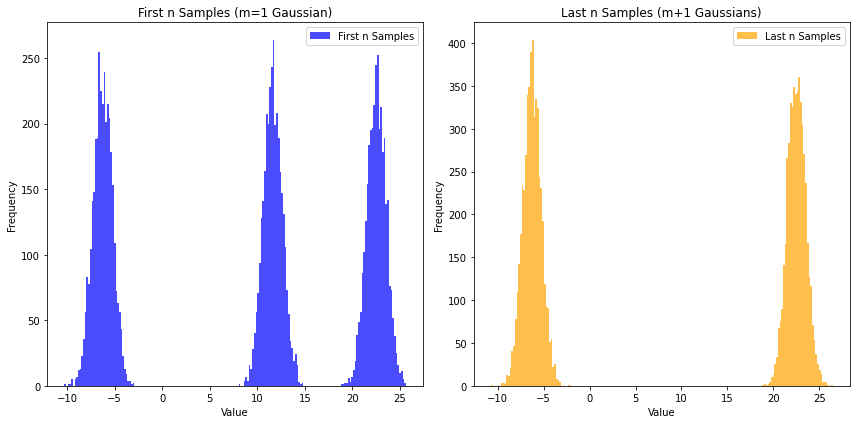

In [31]:
# Verfication 
import matplotlib.pyplot as plt
n = 10000
m = 3
samples = generate_gaussian(m, n, 1, case="removed")

first_n_samples = samples[:n].flatten()
last_n_samples = samples[n:].flatten()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(first_n_samples, bins=200, alpha=0.7, color='blue', label='First n Samples')
plt.title('First n Samples (m=1 Gaussian)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(last_n_samples, bins=200, alpha=0.7, color='orange', label='Last n Samples')
plt.title('Last n Samples (m+1 Gaussians)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
